In [1]:
%autosave 0

Autosave disabled


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv ('AB_NYC_2019.csv')

In [4]:
features = ['neighbourhood_group',
'room_type',
'latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']

In [5]:
df = df[features]

In [6]:
df

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,NaN,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Private room,40.67853,-73.94995,70,2,0,NaN,2,9
48891,Brooklyn,Private room,40.70184,-73.93317,40,4,0,NaN,2,36
48892,Manhattan,Entire home/apt,40.81475,-73.94867,115,10,0,NaN,1,27
48893,Manhattan,Shared room,40.75751,-73.99112,55,1,0,NaN,6,2


In [7]:
df.isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df = df.fillna(0)

In [9]:
df.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Question 1

What is the most frequent observation (mode) for the column 'neighbourhood_group'?

In [10]:
df['neighbourhood_group'].mode()

0    Manhattan
dtype: object

Split the data

    Split your data in train/val/test sets, with 60%/20%/20% distribution.
    Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
    Make sure that the target value ('price') is not in your dataframe.

In [11]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [12]:
len(df_train), len(df_val), len(df_test), len(df_full_train)

(29337, 9779, 9779, 39116)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [14]:
y_train_q6 = df_train.price.values
y_val_q6 = df_val.price.values
y_test_q6 = df_test.price.values
y_full_train_q6 = df_full_train.price.values

Question 2

Create the correlation matrix for the numerical features of your train dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

In [15]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [16]:
categorical_columns

['neighbourhood_group', 'room_type']

In [17]:
s = set(categorical_columns)
numerical_columns = [x for x in features if x not in s]

In [18]:
numerical_columns

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [19]:
corrMatrix = df[numerical_columns].corr()
corrMatrix

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


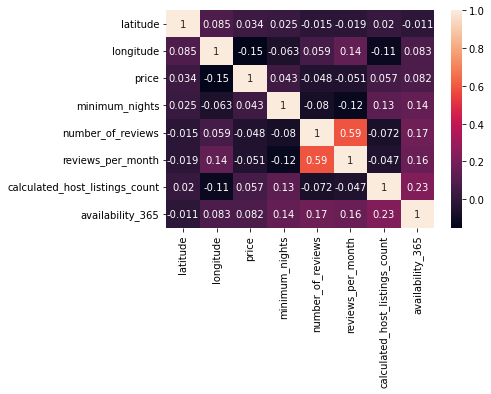

In [20]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corrMatrix, annot=True)
plt.show()

Make price binary

We need to turn the price variable from numeric into binary.

Let's create a variable above_average which is 1 if the price is above (or equal to) 152.

In [21]:
df['above_average'] = (df.price >= 152).astype(int)
df_train['above_average'] = (df_train.price >= 152).astype(int)
df_val['above_average'] = (df_val.price >= 152).astype(int)
df_test['above_average'] = (df_test.price >= 152).astype(int)
df_full_train['above_average'] = (df_full_train.price >= 152).astype(int)

del df_train['price']
del df_val['price']
del df_test['price']
del df_full_train['price']

In [22]:
df

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365,0
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355,1
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,0.00,1,365,0
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194,0
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Private room,40.67853,-73.94995,70,2,0,0.00,2,9,0
48891,Brooklyn,Private room,40.70184,-73.93317,40,4,0,0.00,2,36,0
48892,Manhattan,Entire home/apt,40.81475,-73.94867,115,10,0,0.00,1,27,0
48893,Manhattan,Shared room,40.75751,-73.99112,55,1,0,0.00,6,2,0


Question 3

Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.

Which of these two variables has bigger score?

Round it to 2 decimal digits using round(score, 2)

In [23]:
from sklearn.metrics import mutual_info_score

In [24]:
def mutual_info_binarized_price_score(series):
    return round(mutual_info_score(series, df_train.above_average), 2)

mi = df_train[categorical_columns].apply(mutual_info_binarized_price_score)
mi.sort_values(ascending=False)

room_type              0.14
neighbourhood_group    0.05
dtype: float64

Question 4

Now let's train a logistic regression

Remember that we have two categorical variables in the data. Include them using one-hot encoding.

Fit the model on the training dataset.

To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:

model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.

In [25]:
from sklearn.feature_extraction import DictVectorizer

In [26]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values
y_full_train = df_full_train.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']
del df_full_train['above_average']

In [27]:
numerical_columns = numerical_columns

In [28]:
numerical_columns.remove('price')

In [29]:
numerical_columns

['latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [30]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42, max_iter=3000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000, random_state=42)

In [33]:
y_pred = model.predict_proba(X_val)[:, 1]

In [34]:
above_average_decision = (y_pred >= 0.5)

In [35]:
accuracy = (y_val == above_average_decision).mean()
round(accuracy,2)

0.79

In [36]:
dv.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

Question 5

We have 9 features: 7 numerical features and 2 categorical.

Let's find the least useful one using the feature elimination technique.

Train a model with all these features (using the same parameters as in Q4).

Now exclude each feature from this set and train a model without it. Record the accuracy for each model.

For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

neighbourhood_group

room_type

number_of_reviews

reviews_per_month

In [37]:
columns = list(df_train.columns)
original_accuracy = accuracy
iteration_counter = 0


In [38]:
for column in columns:
    features_without_removed = columns.copy()
    del features_without_removed[iteration_counter]
    
    dv = DictVectorizer(sparse=False)

    train_dict = df_train[features_without_removed].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[features_without_removed].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42, max_iter=3000)
    model.fit(X_train, y_train)
    
    y_pred = model.predict_proba(X_val)[:, 1]
    above_average_decision = (y_pred >= 0.5)
    accuracy = (y_val == above_average_decision).mean()
    
    iteration_counter = iteration_counter + 1
    
    print(f"Feature excluded: {column} \n original_accuracy - accuracy_without_the_feature: {original_accuracy - accuracy}  ")

Feature excluded: neighbourhood_group 
 original_accuracy - accuracy_without_the_feature: 0.039881378464055595  
Feature excluded: room_type 
 original_accuracy - accuracy_without_the_feature: 0.0619695265364556  
Feature excluded: latitude 
 original_accuracy - accuracy_without_the_feature: 0.003885877901625867  
Feature excluded: longitude 
 original_accuracy - accuracy_without_the_feature: 0.003885877901625867  
Feature excluded: minimum_nights 
 original_accuracy - accuracy_without_the_feature: -0.00030677983433891054  
Feature excluded: number_of_reviews 
 original_accuracy - accuracy_without_the_feature: -0.0004090397791185474  
Feature excluded: reviews_per_month 
 original_accuracy - accuracy_without_the_feature: -0.00030677983433891054  
Feature excluded: calculated_host_listings_count 
 original_accuracy - accuracy_without_the_feature: 0.0012271193373555311  
Feature excluded: availability_365 
 original_accuracy - accuracy_without_the_feature: 0.009407914919725924  


Question 6

For this question, we'll see how to use a linear regression model from Scikit-Learn

We'll need to use the original column 'price'. Apply the logarithmic transformation to this column.

Fit the Ridge regression model on the training data.

This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]

Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest alpha.

In [39]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [40]:
alphas = [0, 0.01, 0.1, 1, 10]

In [41]:
train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [42]:
y_train_q6 = np.log1p(y_train_q6)
y_val_q6 = np.log1p(y_val_q6)

In [43]:
for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train_q6)
    y_pred = model.predict(X_val) 
    rmse = mean_squared_error(y_val_q6, y_pred)
    print(f"For alpha: {a} \n RMSE:", round(rmse, 3))
    print()

For alpha: 0 
 RMSE: 0.247

For alpha: 0.01 
 RMSE: 0.247

For alpha: 0.1 
 RMSE: 0.247

For alpha: 1 
 RMSE: 0.247

For alpha: 10 
 RMSE: 0.248

